
## INE Instituto nacional de estadística

In [1]:
%load_ext autoreload
%autoreload 2
import json
import os
import re
import sys
from datetime import date
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import requests

cwd = Path.cwd()
home = Path.home()
module_path = f"{home}/serhi/src/lib" if cwd == home else f"{cwd.parents[1]}/lib"
sys.path.append(module_path)
import serhi

SerHi Tools


In [2]:
# inicio
# cambiar como corresponda

ENTITY = "ine"
NB_NAME = "ine_ipc"
serhi.initialize(ENTITY, NB_NAME)

serhi.CWD /home/runner/work/serhi/serhi/src/entidades/ine
serhi.HOME /home/runner
serhi.BASE_PATH /home/runner/work/serhi/serhi
serhi.DATA_PATH /home/runner/work/serhi/serhi/data/process/ine/
serhi.DOWN_PATH /home/runner/work/serhi/serhi/tmp/download/ine/
serhi.OUT_FILE /home/runner/work/serhi/serhi/data/process/ine/ine_ipc.csv


In [3]:
def download_files(urls):
    for loc in urls:
        url = loc["url"]
        r = requests.get(url, allow_redirects=True)
        print(f"Downloading {url}")
        open(serhi.DOWN_PATH + loc["file"], "wb").write(r.content)


urls = [
    {
        # indices nacionales general y grupos
        "url": "https://www.ine.es/jaxiT3/files/t/es/xlsx/50902.xlsx?nocab=1",
        "file": "ine_ipc_1.xlsx",
    },
    {
        # indices nacionales subgrupos
        "url": "https://www.ine.es/jaxiT3/files/t/es/xlsx/50903.xlsx?nocab=1",
        "file": "ine_ipc_subgrupos.xlsx",
    },
]

download_files(urls)

In [4]:
# IPC Grupos
loc = urls[0]
file = loc["file"]
df = pd.read_excel(serhi.DOWN_PATH + file, skiprows=6, nrows=13, header=(0, 1))
df.head()

/opt/hostedtoolcache/Python/3.9.16/x64/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Índice           \
                                                      2022M12  2022M11   
0                                     Índice general  109.899  109.734   
1              01 Alimentos y bebidas no alcohólicas  119.044  117.185   
2                    02 Bebidas alcohólicas y tabaco  108.019  105.017   
3                               03 Vestido y calzado  111.381  111.761   
4      04 Vivienda, agua, electricidad, gas y otr...  107.680  106.893   

                                                                  ...  \
   2022M10  2022M09  2022M08  2022M07  2022M06  2022M05  2022M04  ...   
0  109.866  109.498  110.265  109.986  110.267  108.262  107.375  ...   
1  116.610  114.017  113.481  112.950  112.609  110.658  109.328  ...   
2  104.582  104.399  104.243  103.967  103.589  103.146  103.127  ...   
3  108.164   99.711   96.232   96.840  107.796  108.442  105.585  ...   
4  110.790  118.604  125.137  120.761  117.695  113.807  114.653  ...   

  Variación en lo que va de año                                          \
                        2002M10 2002M09 2002M08 2002M07 2002M06 2002M05   
0                           3.5     2.5     2.1     1.8     2.5     2.5   
1                           3.8     3.6     3.1     2.6     2.2     1.9   
2                           4.6     4.6     4.6     4.5     4.5     4.4   
3                           2.0    -6.3    -8.8    -8.2     0.7     1.1   
4                           2.7     2.6     2.3     2.2     1.9     1.7   

                                   
  2002M04 2002M03 2002M02 2002M01  
0     2.1     0.8     0.0    -0.1  
1     1.5     0.8     0.3     0.3  
2     4.2     0.1    -0.1    -0.1  
3     0.1    -6.6    -8.5    -7.5  
4     1.5     1.2     0.9     0.7  

[5 rows x 1009 columns]

In [5]:
df.tail()

Índice                             \
                                      2022M12  2022M11  2022M10  2022M09   
8                  08 Comunicaciones   97.585   97.529   97.574   97.713   
9                  09 Ocio y cultura  105.137  103.326  103.478  103.660   
10                      10 Enseñanza  102.193  102.320  102.218  101.549   
11         11 Restaurantes y hoteles  109.379  108.625  108.900  108.704   
12      12 Otros bienes y servicios   105.395  105.027  104.634  104.141   

                                                 ...  \
    2022M08  2022M07  2022M06  2022M05  2022M04  ...   
8    97.866   97.908   99.898   99.964  100.092  ...   
9   105.115  104.027  102.796  101.553  102.301  ...   
10  100.869  100.858  100.844  100.835  100.817  ...   
11  108.522  108.058  107.102  105.700  104.937  ...   
12  104.047  103.653  103.691  103.159  102.859  ...   

   Variación en lo que va de año                                          \
                         2002M10 2002M09 2002M08 2002M07 2002M06 2002M05   
8                           -1.7    -1.6    -2.0    -2.0    -1.7    -1.5   
9                            0.9     1.7     3.3     2.1     1.4     0.8   
10                           3.9     1.4     0.7     0.7     0.6     0.6   
11                           5.5     5.6     6.1     5.3     4.5     4.1   
12                           3.6     3.5     3.2     3.1     3.0     2.9   

                                    
   2002M04 2002M03 2002M02 2002M01  
8     -1.5    -1.5    -0.3     1.2  
9      0.5     1.0    -0.6    -0.6  
10     0.6     0.5     0.4     0.3  
11     3.7     3.0     2.0     1.0  
12     2.7     2.5     2.2     2.0  

[5 rows x 1009 columns]

In [6]:
df.columns.levels[0]

Index([' ', 'Variación anual', 'Variación en lo que va de año',
       'Variación mensual', 'Índice'],
      dtype='object')

In [7]:
# tenemos varios indicadores
# índice - idx
# variación mensual - idx_vm
# variación anual - idx_va
# variación lo q va de año - idx_vaa

In [8]:
df = df.rename(columns={" ": "Name"})

In [9]:
dt = df[['Name', 'Índice']]

In [10]:
dt

Name   Índice           \
                                                 Name  2022M12  2022M11   
0                                      Índice general  109.899  109.734   
1               01 Alimentos y bebidas no alcohólicas  119.044  117.185   
2                     02 Bebidas alcohólicas y tabaco  108.019  105.017   
3                                03 Vestido y calzado  111.381  111.761   
4       04 Vivienda, agua, electricidad, gas y otr...  107.680  106.893   
5       05 Muebles, artículos del hogar y artículo...  110.166  109.386   
6                                          06 Sanidad  101.507  101.493   
7                                       07 Transporte  106.957  112.539   
8                                   08 Comunicaciones   97.585   97.529   
9                                   09 Ocio y cultura  105.137  103.326   
10                                       10 Enseñanza  102.193  102.320   
11                          11 Restaurantes y hoteles  109.379  108.625   
12                       12 Otros bienes y servicios   105.395  105.027   

                                                                   ...  \
    2022M10  2022M09  2022M08  2022M07  2022M06  2022M05  2022M04  ...   
0   109.866  109.498  110.265  109.986  110.267  108.262  107.375  ...   
1   116.610  114.017  113.481  112.950  112.609  110.658  109.328  ...   
2   104.582  104.399  104.243  103.967  103.589  103.146  103.127  ...   
3   108.164   99.711   96.232   96.840  107.796  108.442  105.585  ...   
4   110.790  118.604  125.137  120.761  117.695  113.807  114.653  ...   
5   108.580  107.695  107.174  106.867  106.704  105.984  105.164  ...   
6   101.303  101.332  101.198  101.225  101.093  101.073  101.074  ...   
7   112.593  110.984  112.614  116.952  119.210  113.642  110.466  ...   
8    97.574   97.713   97.866   97.908   99.898   99.964  100.092  ...   
9   103.478  103.660  105.115  104.027  102.796  101.553  102.301  ...   
10  102.218  101.549  100.869  100.858  100.844  100.835  100.817  ...   
11  108.900  108.704  108.522  108.058  107.102  105.700  104.937  ...   
12  104.634  104.141  104.047  103.653  103.691  103.159  102.859  ...   

                                                                            \
    2002M10  2002M09  2002M08  2002M07  2002M06  2002M05  2002M04  2002M03   
0    72.058   71.351   71.085   70.882   71.377   71.374   71.118   70.165   
1    68.153   68.028   67.672   67.354   67.075   66.902   66.614   66.185   
2    48.523   48.515   48.506   48.475   48.447   48.446   48.321   46.436   
3    91.177   83.801   81.520   82.087   89.997   90.427   89.456   83.519   
4    59.927   59.863   59.696   59.607   59.470   59.324   59.223   59.041   
5    83.055   82.643   82.370   82.358   82.920   82.686   82.336   81.819   
6    87.934   87.790   87.726   87.700   87.501   87.212   87.665   87.210   
7    66.341   66.044   65.784   65.585   65.545   66.191   66.018   65.007   
8   124.883  125.004  124.516  124.500  124.891  125.098  125.098  125.098   
9   103.085  103.921  105.582  104.308  103.616  102.968  102.658  103.157   
10   60.469   59.018   58.603   58.587   58.571   58.563   58.556   58.496   
11   66.305   66.362   66.701   66.184   65.696   65.416   65.182   64.756   
12   66.744   66.693   66.471   66.410   66.381   66.299   66.185   66.045   

                      
    2002M02  2002M01  
0    69.590   69.530  
1    65.836   65.859  
2    46.348   46.340  
3    81.782   82.717  
4    58.888   58.763  
5    81.475   81.364  
6    86.844   86.313  
7    64.089   63.805  
8   126.667  128.593  
9   101.580  101.553  
10   58.430   58.352  
11   64.123   63.523  
12   65.834   65.705  

[13 rows x 253 columns]

In [11]:
dt.columns = dt.columns.droplevel()
dt

,Name,2022M12,2022M11,2022M10,2022M09,2022M08,2022M07,2022M06,2022M05,2022M04,...,2002M10,2002M09,2002M08,2002M07,2002M06,2002M05,2002M04,2002M03,2002M02,2002M01
0,Índice general,109.899,109.734,109.866,109.498,110.265,109.986,110.267,108.262,107.375,...,72.058,71.351,71.085,70.882,71.377,71.374,71.118,70.165,69.590,69.530
1,01 Alimentos y bebidas no alcohólicas,119.044,117.185,116.610,114.017,113.481,112.950,112.609,110.658,109.328,...,68.153,68.028,67.672,67.354,67.075,66.902,66.614,66.185,65.836,65.859
2,02 Bebidas alcohólicas y tabaco,108.019,105.017,104.582,104.399,104.243,103.967,103.589,103.146,103.127,...,48.523,48.515,48.506,48.475,48.447,48.446,48.321,46.436,46.348,46.340
3,03 Vestido y calzado,111.381,111.761,108.164,99.711,96.232,96.840,107.796,108.442,105.585,...,91.177,83.801,81.520,82.087,89.997,90.427,89.456,83.519,81.782,82.717
4,"04 Vivienda, agua, electricidad, gas y otr...",107.680,106.893,110.790,118.604,125.137,120.761,117.695,113.807,114.653,...,59.927,59.863,59.696,59.607,59.470,59.324,59.223,59.041,58.888,58.763
5,"05 Muebles, artículos del hogar y artículo...",110.166,109.386,108.580,107.695,107.174,106.867,106.704,105.984,105.164,...,83.055,82.643,82.370,82.358,82.920,82.686,82.336,81.819,81.475,81.364
6,06 Sanidad,101.507,101.493,101.303,101.332,101.198,101.225,101.093,101.073,101.074,...,87.934,87.790,87.726,87.700,87.501,87.212,87.665,87.210,86.844,86.313
7,07 Transporte,106.957,112.539,112.593,110.984,112.614,116.952,119.210,113.642,110.466,...,66.341,66.044,65.784,65.585,65.545,66.191,66.018,65.007,64.089,63.805
8,08 Comunicaciones,97.585,97.529,97.574,97.713,97.866,97.908,99.898,99.964,100.092,...,124.883,125.004,124.516,124.500,124.891,125.098,125.098,125.098,126.667,128.593
9,09 Ocio y cultura,105.137,103.326,103.478,103.660,105.115,104.027,102.796,101.553,102.301,...,103.085,103.921,105.582,104.308,103.616,102.968,102.658,103.157,101.580,101.553


In [12]:
def generate_series(df, uni="idx", set_name=""):
    # Generate Series BBDD
    # Date, Type (i,v), Name, Value
    serie = df.unstack().copy()
    serie = serie.to_frame()
    serie.reset_index(inplace=True)
    serie.columns = ["Name", "Date", "Value"]
    serie = serie[serie["Name"] != "Date"].copy()
    serie["Ud"] = uni
    serie["Set"] = set_name
    return serie


def ine_sheet_simple(df, set_name, delete_first=True, uni="idx"):
    columns = [w.replace("M", "-") for w in df.columns]
    columns[0] = "Name"
    df.columns = columns
    df = df.T
    # promote columns
    df.columns = df.iloc[0]
    df = df[1:]
    df.reset_index(inplace=True)
    df.rename(columns={"index": "Date"}, inplace=True)
    df.columns = [w.strip() for w in df.columns]
    df.set_index(df["Date"], drop=True, inplace=True)
    df = generate_series(df, uni=uni, set_name=set_name)
    return df

In [13]:
dt = ine_sheet_simple(dt, set_name="INE_IPC_GEN")
dt.head()

,Name,Date,Value,Ud,Set
252,Índice general,2022-12,109.899,idx,INE_IPC_GEN
253,Índice general,2022-11,109.734,idx,INE_IPC_GEN
254,Índice general,2022-10,109.866,idx,INE_IPC_GEN
255,Índice general,2022-09,109.498,idx,INE_IPC_GEN
256,Índice general,2022-08,110.265,idx,INE_IPC_GEN


In [14]:
df.tail()

Name   Índice                             \
                                Name  2022M12  2022M11  2022M10  2022M09   
8                  08 Comunicaciones   97.585   97.529   97.574   97.713   
9                  09 Ocio y cultura  105.137  103.326  103.478  103.660   
10                      10 Enseñanza  102.193  102.320  102.218  101.549   
11         11 Restaurantes y hoteles  109.379  108.625  108.900  108.704   
12      12 Otros bienes y servicios   105.395  105.027  104.634  104.141   

                                                 ...  \
    2022M08  2022M07  2022M06  2022M05  2022M04  ...   
8    97.866   97.908   99.898   99.964  100.092  ...   
9   105.115  104.027  102.796  101.553  102.301  ...   
10  100.869  100.858  100.844  100.835  100.817  ...   
11  108.522  108.058  107.102  105.700  104.937  ...   
12  104.047  103.653  103.691  103.159  102.859  ...   

   Variación en lo que va de año                                          \
                         2002M10 2002M09 2002M08 2002M07 2002M06 2002M05   
8                           -1.7    -1.6    -2.0    -2.0    -1.7    -1.5   
9                            0.9     1.7     3.3     2.1     1.4     0.8   
10                           3.9     1.4     0.7     0.7     0.6     0.6   
11                           5.5     5.6     6.1     5.3     4.5     4.1   
12                           3.6     3.5     3.2     3.1     3.0     2.9   

                                    
   2002M04 2002M03 2002M02 2002M01  
8     -1.5    -1.5    -0.3     1.2  
9      0.5     1.0    -0.6    -0.6  
10     0.6     0.5     0.4     0.3  
11     3.7     3.0     2.0     1.0  
12     2.7     2.5     2.2     2.0  

[5 rows x 1009 columns]

In [15]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 252 to 3527
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3276 non-null   object
 1   Date    3276 non-null   object
 2   Value   3276 non-null   object
 3   Ud      3276 non-null   object
 4   Set     3276 non-null   object
dtypes: object(5)
memory usage: 153.6+ KB


In [16]:
dt["Name"].unique()

array(['Índice general', '01 Alimentos y bebidas no alcohólicas',
       '02 Bebidas alcohólicas y tabaco', '03 Vestido y calzado',
       '04 Vivienda, agua, electricidad, gas y otros combustibles',
       '05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar',
       '06 Sanidad', '07 Transporte', '08 Comunicaciones',
       '09 Ocio y cultura', '10 Enseñanza', '11 Restaurantes y hoteles',
       '12 Otros bienes y servicios'], dtype=object)

In [17]:
dt["Date"] = pd.to_datetime(dt["Date"])
dt["Date"].agg(["min", "max"])

min   2002-01-01
max   2022-12-01
Name: Date, dtype: datetime64[ns]

In [18]:
# repetimos con cada serie
df.columns.levels[0]

Index(['Name', 'Variación anual', 'Variación en lo que va de año',
       'Variación mensual', 'Índice'],
      dtype='object')

In [19]:
dt = pd.DataFrame()
unidades = ["idx_va", "idx_vaa", "idx_vm", "idx"]
series = df.columns.levels[0][1:]

for i, s in enumerate(series):
    print(i, s, unidades[i])
    dts = df[["Name", s]].copy()
    dts.columns = dts.columns.droplevel()
    # print(dts)
    dtt = ine_sheet_simple(dts, set_name="INE_IPC_GEN", uni=unidades[i])
    dt = pd.concat([dt, dtt])

0 Variación anual idx_va
1 Variación en lo que va de año idx_vaa
2 Variación mensual idx_vm
3 Índice idx


In [20]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13104 entries, 252 to 3527
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    13104 non-null  object
 1   Date    13104 non-null  object
 2   Value   13104 non-null  object
 3   Ud      13104 non-null  object
 4   Set     13104 non-null  object
dtypes: object(5)
memory usage: 614.2+ KB


In [21]:
#df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
#df["Value"] = df["Value"].fillna(0)

In [22]:
dt['Date'] = pd.to_datetime(dt['Date'])

idx_va


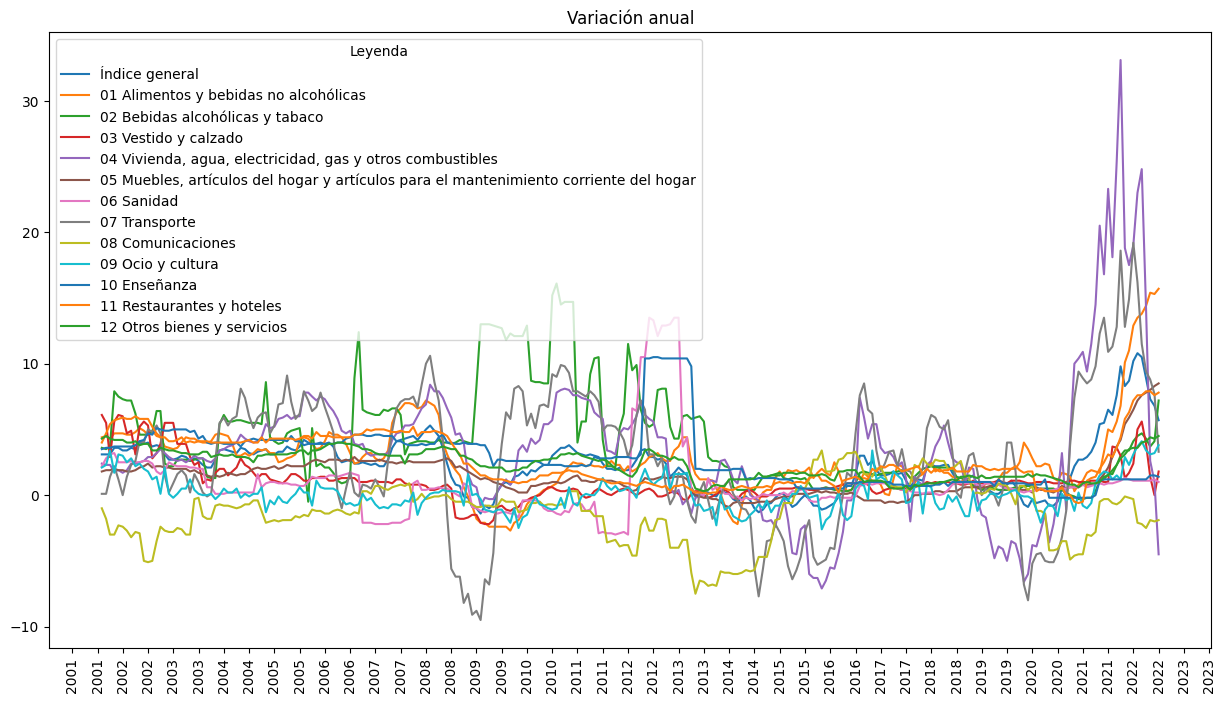

idx_vaa


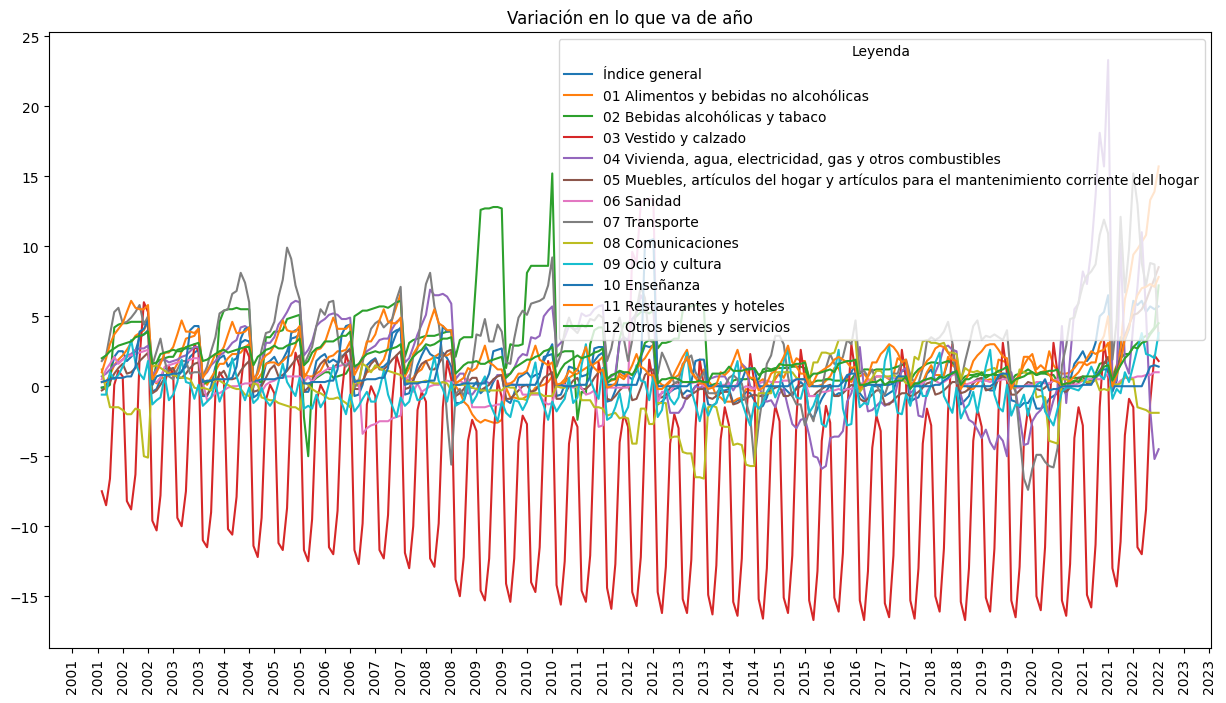

idx_vm


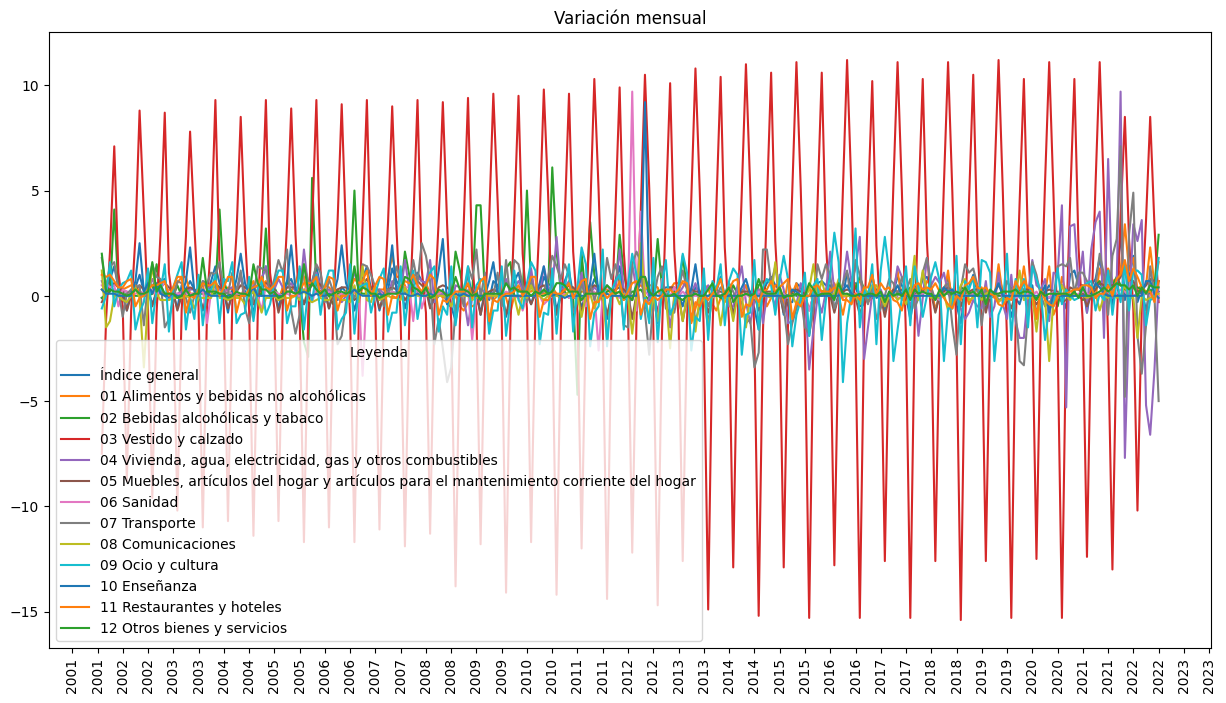

idx


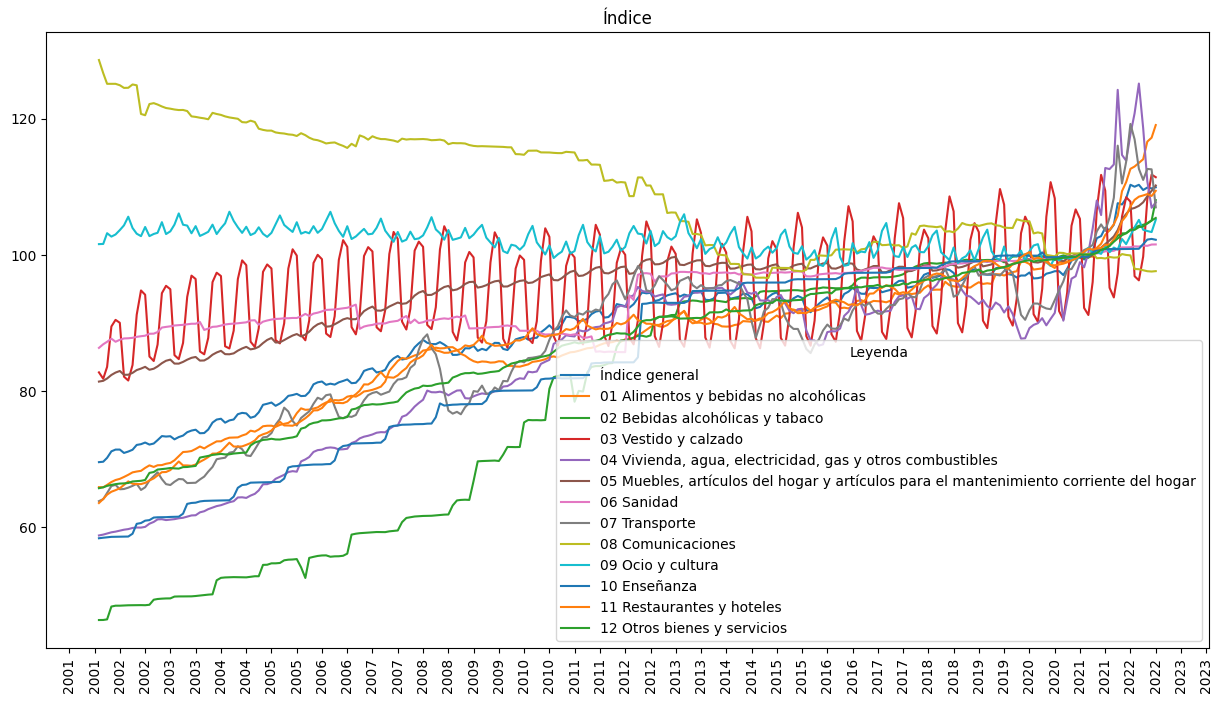

In [23]:
names = dt["Name"].unique()

for i, u in enumerate(unidades):
    fig, ax = plt.subplots(figsize=(15, 8))
    print(u)
    dx = dt[dt["Ud"] == u]
    plt.title(series[i])
    half_year_locator = mdates.MonthLocator(interval=6)
    ax.xaxis.set_major_locator(half_year_locator)
    for n in names:
        dxz = dx[dx["Name"] == n]
        plt.plot(dxz["Date"], dxz["Value"], label=f"{n}")
    plt.legend(title="Leyenda")
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.show()

In [24]:
# Guardamos la serie procesada
df.to_csv(serhi.OUT_FILE, index=False)

In [25]:
# inicio
# cambiamos los datos y reiniciamos

ENTITY = "ine"
NB_NAME = "ine_ipc_g"

serhi.initialize(ENTITY, NB_NAME)

serhi.CWD /home/runner/work/serhi/serhi/src/entidades/ine
serhi.HOME /home/runner
serhi.BASE_PATH /home/runner/work/serhi/serhi
serhi.DATA_PATH /home/runner/work/serhi/serhi/data/process/ine/
serhi.DOWN_PATH /home/runner/work/serhi/serhi/tmp/download/ine/
serhi.OUT_FILE /home/runner/work/serhi/serhi/data/process/ine/ine_ipc_g.csv


In [26]:
# IPC Sub Grupos
loc = urls[1]
file = loc["file"]
df = pd.read_excel(serhi.DOWN_PATH + file, skiprows=6, nrows=43, header=(0, 1))
df.head()

/opt/hostedtoolcache/Python/3.9.16/x64/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Índice                             \
                                   2022M12  2022M11  2022M10  2022M09   
0                  Índice general  109.899  109.734  109.866  109.498   
1                   011 Alimentos  119.409  117.553  117.065  114.354   
2      012 Bebidas no alcohólicas  114.130  112.226  110.487  109.480   
3        021 Bebidas alcohólicas   109.054  108.851  108.312  107.848   
4                      022 Tabaco  107.305  102.488  102.120  102.120   

                                                ...  \
   2022M08  2022M07  2022M06  2022M05  2022M04  ...   
0  110.265  109.986  110.267  108.262  107.375  ...   
1  113.795  113.246  112.966  110.883  109.524  ...   
2  109.241  108.960  107.801  107.621  106.682  ...   
3  107.452  106.768  105.869  105.276  105.222  ...   
4  102.119  102.109  102.069  101.723  101.728  ...   

  Variación en lo que va de año                                          \
                        2002M10 2002M09 2002M08 2002M07 2002M06 2002M05   
0                           3.5     2.5     2.1     1.8     2.5     2.5   
1                           3.9     3.7     3.1     2.6     2.2       2   
2                           2.1     2.1     2.1       2     1.7     0.8   
3                           2.3     2.2     2.2     1.9     1.8     1.8   
4                           5.5     5.5     5.5     5.5     5.5     5.5   

                                   
  2002M04 2002M03 2002M02 2002M01  
0     2.1     0.8       0    -0.1  
1     1.5     0.8     0.3     0.3  
2     0.7     0.5       0    -0.1  
3     1.5     1.1     0.4     0.4  
4     5.2    -0.2    -0.3    -0.3  

[5 rows x 1009 columns]

In [27]:
df.tail()

Índice                    \
                                              2022M12  2022M11  2022M10   
37           123 Efectos personales n.c.o.p.  106.971  106.319  105.778   
38                     124 Protección social  104.395  104.151  104.065   
39                               125 Seguros  102.503  102.503  102.503   
40      126 Servicios financieros n.c.o.p.    108.704  108.704  108.704   
41              127 Otros servicios n.c.o.p.  101.317  101.295  101.245   

                                                          ...  \
    2022M09  2022M08  2022M07  2022M06  2022M05  2022M04  ...   
37  105.161  104.897  104.956  106.516  105.259  103.534  ...   
38  103.845  103.827  103.786  103.574  103.468  103.268  ...   
39  102.503  102.503  102.503  102.503  102.503  102.503  ...   
40  108.704  108.704  108.704  108.704  108.704  108.704  ...   
41  101.246  101.201  101.160  101.095  101.057  101.104  ...   

   Variación en lo que va de año                                          \
                         2002M10 2002M09 2002M08 2002M07 2002M06 2002M05   
37                           1.6       1     0.7     0.8     1.5     0.7   
38                                                                         
39                           4.4     4.3     4.2     4.1     3.9     3.9   
40                         -12.5     -12     -12   -12.1    -5.9    -5.9   
41                           2.5     2.4     2.4     2.3     2.3     2.3   

                                    
   2002M04 2002M03 2002M02 2002M01  
37     0.3    -0.7    -1.5    -1.5  
38                                  
39     3.9     3.9     3.8     3.7  
40    -5.5    -5.5    -5.5       0  
41     2.2     2.2     1.9     1.5  

[5 rows x 1009 columns]

In [28]:
df = df.rename(columns={' ': 'Name'})

In [29]:
df['Name']['Name'].unique()

array(['    Índice general', '    011 Alimentos',
       '    012 Bebidas no alcohólicas', '    021 Bebidas alcohólicas ',
       '    022 Tabaco', '    031 Vestido',
       '    032 Calzado y sus reparaciones',
       '    041 Alquiler de vivienda',
       '    043 Conservación y reparación de la vivienda',
       '    044 Suministro de agua y otros servicios relacionados con la vivienda',
       '    045 Electricidad, gas y otros combustibles',
       '    051 Muebles y accesorios, alfombras y otros revestimientos de suelos',
       '    052 Artículos textiles para el hogar',
       '    053 Aparatos domésticos',
       '    054 Cristalería, vajilla y utensilios para el hogar',
       '    055 Herramientas y equipos para el hogar y el jardín  ',
       '    056 Bienes y servicios para el mantenimiento corriente del hogar',
       '    061 Productos, aparatos y equipos médicos',
       '    062 Servicios ambulatorios',
       '    063 Servicios hospitalarios',
       '    071 Adquisic

In [30]:
# realizamos el mismo proceso 
df.columns.levels[0]

Index(['Name', 'Variación anual', 'Variación en lo que va de año',
       'Variación mensual', 'Índice'],
      dtype='object')

In [31]:
dt = pd.DataFrame()
unidades = ["idx_va", "idx_vaa", "idx_vm", "idx"]
series = df.columns.levels[0][1:]

for i, s in enumerate(series):
    print(i, s, unidades[i])
    dts = df[["Name", s]].copy()
    dts.columns = dts.columns.droplevel()
    dtt = ine_sheet_simple(dts, set_name="INE_IPC_SUB", uni=unidades[i])
    dt = pd.concat([dt, dtt])

0 Variación anual idx_va
1 Variación en lo que va de año idx_vaa
2 Variación mensual idx_vm
3 Índice idx


In [32]:
# Guardamos la serie procesada
df.to_csv(serhi.OUT_FILE, index=False)